# Tabular ANN for Exploration of DEAP Dataset
Fingerprinting with DMD modes has worked really well. What about in tabular format?

In [1]:
%load_ext autoreload
%autoreload 2

%matplotlib inline

In [2]:
%%javascript
utils.load_extension('collapsible_headings/main')
utils.load_extension('hide_input/main')
utils.load_extension('execute_time/ExecuteTime')
utils.load_extension('code_prettify/code_prettify')
utils.load_extension('scroll_down/main')
utils.load_extension('jupyter-js-widgets/extension')

<IPython.core.display.Javascript object>

In [3]:
from fastai.tabular import *
from sklearn import preprocessing

In [4]:
PATH = "/media/tris/tris_files/EEG_datasets/DMD/tabular"

In [5]:
df_raw = pd.read_csv('/media/tris/tris_files/EEG_datasets/DMD/tabular/dmd_deap_100modes_window.csv')
df_raw

,Subject,Trial,Real_Comp1_Mode1,Real_Comp2_Mode1,Real_Comp3_Mode1,Real_Comp4_Mode1,Real_Comp5_Mode1,Real_Comp6_Mode1,Real_Comp7_Mode1,Real_Comp8_Mode1,...,zeta41,zeta42,zeta43,zeta44,zeta45,zeta46,zeta47,zeta48,zeta49,zeta50
0,1,1,0.005431,0.012530,-0.269825,-0.375614,0.914885,-1.176777,-0.941301,-1.313073,...,0.080326,0.070850,0.080008,0.094005,0.135541,0.112373,0.100734,0.128613,0.125150,0.107111
1,1,2,-0.000799,0.002087,0.369963,0.278700,-1.324435,-0.552797,0.496026,-0.323764,...,0.077731,0.047725,0.062254,0.056294,0.149005,0.078652,0.081211,0.290682,0.189171,0.131338
2,1,3,-0.000435,0.009294,-0.070998,-0.284294,0.159417,0.190779,-0.282252,-0.335525,...,0.033241,0.081293,0.056094,0.071250,0.098889,0.061183,0.111832,0.093800,0.093194,0.163935
3,1,4,-0.000095,0.015823,-0.326236,-0.163558,0.060981,-0.024196,0.145497,-0.470305,...,0.122306,0.083848,0.050766,0.087258,0.072479,0.112094,0.078688,0.122722,0.096819,0.137454
4,1,5,-0.000206,-0.003904,0.273253,-0.021612,-0.432145,-0.215388,1.703735,1.203146,...,0.092197,0.076245,0.064597,0.061358,0.089001,0.135589,0.097876,0.219396,0.157625,0.086120
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5115,32,156,0.173293,-1.674898,2.575148,1.375505,-0.695417,1.897614,2.757814,1.002052,...,0.157219,0.143659,0.192961,0.163244,0.125673,0.148244,0.264065,0.867348,0.712029,0.302496
5116,32,157,0.022598,-0.116148,4.590610,6.522274,1.184992,-1.524824,3.600517,0.173518,...,0.147014,0.123132,0.099908,0.215058,0.121265,0.124218,0.168052,0.163304,0.236534,0.261621
5117,32,158,0.003047,5.534397,-3.202882,-1.475133,1.154708,1.016064,-3.625109,-1.102791,...,0.135944,0.114268,0.135572,0.153699,0.342595,0.149024,0.535749,0.183669,0.252830,0.189697
5118,32,159,-0.040428,3.824801,0.447949,-1.808472,-3.123874,2.601281,-0.574732,-0.339513,...,0.090159,0.129550,0.500261,0.116395,0.122605,0.200922,0.156182,0.215805,0.516519,0.996608


In [6]:
df_raw.iloc[[40],:]

,Subject,Trial,Real_Comp1_Mode1,Real_Comp2_Mode1,Real_Comp3_Mode1,Real_Comp4_Mode1,Real_Comp5_Mode1,Real_Comp6_Mode1,Real_Comp7_Mode1,Real_Comp8_Mode1,...,zeta41,zeta42,zeta43,zeta44,zeta45,zeta46,zeta47,zeta48,zeta49,zeta50
40,1,41,-0.00391,0.003071,-0.035798,-0.007609,0.050028,-0.281927,-0.034012,-1.105139,...,0.074528,0.085901,0.095718,0.124542,0.100527,0.091238,0.220803,0.12293,0.161288,0.148139


In [7]:
os.makedirs('tmp', exist_ok=True)
df_raw.to_feather('tmp/eeg-raw')

In [8]:
import pandas as pd
df_raw = pd.read_feather('tmp/eeg-raw') #lol raw sashimis and sushis
df_raw.head()

,Subject,Trial,Real_Comp1_Mode1,Real_Comp2_Mode1,Real_Comp3_Mode1,Real_Comp4_Mode1,Real_Comp5_Mode1,Real_Comp6_Mode1,Real_Comp7_Mode1,Real_Comp8_Mode1,...,zeta41,zeta42,zeta43,zeta44,zeta45,zeta46,zeta47,zeta48,zeta49,zeta50
0,1,1,0.005431,0.012530,-0.269825,-0.375614,0.914885,-1.176777,-0.941301,-1.313073,...,0.080326,0.070850,0.080008,0.094005,0.135541,0.112373,0.100734,0.128613,0.125150,0.107111
1,1,2,-0.000799,0.002087,0.369963,0.278700,-1.324435,-0.552797,0.496026,-0.323764,...,0.077731,0.047725,0.062254,0.056294,0.149005,0.078652,0.081211,0.290682,0.189171,0.131338
2,1,3,-0.000435,0.009294,-0.070998,-0.284294,0.159417,0.190779,-0.282252,-0.335525,...,0.033241,0.081293,0.056094,0.071250,0.098889,0.061183,0.111832,0.093800,0.093194,0.163935
3,1,4,-0.000095,0.015823,-0.326236,-0.163558,0.060981,-0.024196,0.145497,-0.470305,...,0.122306,0.083848,0.050766,0.087258,0.072479,0.112094,0.078688,0.122722,0.096819,0.137454
4,1,5,-0.000206,-0.003904,0.273253,-0.021612,-0.432145,-0.215388,1.703735,1.203146,...,0.092197,0.076245,0.064597,0.061358,0.089001,0.135589,0.097876,0.219396,0.157625,0.086120


In [9]:
df_raw.iloc[[500],:]

,Subject,Trial,Real_Comp1_Mode1,Real_Comp2_Mode1,Real_Comp3_Mode1,Real_Comp4_Mode1,Real_Comp5_Mode1,Real_Comp6_Mode1,Real_Comp7_Mode1,Real_Comp8_Mode1,...,zeta41,zeta42,zeta43,zeta44,zeta45,zeta46,zeta47,zeta48,zeta49,zeta50
500,4,21,0.720072,-0.123333,0.29695,-8.628331,9.500244,-1.020138,-2.969546,-4.830578,...,0.096244,0.124643,0.136517,0.128786,0.119467,0.20756,0.21075,0.192701,0.222929,1.0


In [10]:
path = '/media/tris/tris_files/EEG_datasets/DEAP_data_preprocessed_python/s01.dat'
df_read = pickle.load(open(path, 'rb'), encoding='latin1')
labels=df_read['labels']
df_tmp = pd.DataFrame(labels, columns=['valence','arousal','dominance','liking'])
df=df_tmp
for n in range (2,10):
    path = '/media/tris/tris_files/EEG_datasets/DEAP_data_preprocessed_python/s0'+str(n)+'.dat'
    df_read = pickle.load(open(path, 'rb'), encoding='latin1')
    labels=df_read['labels']
    df_tmp = pd.DataFrame(labels, columns=['valence','arousal','dominance','liking'])
    df=df.append(df_tmp, ignore_index=True)
for n in range (10,33):
    path = '/media/tris/tris_files/EEG_datasets/DEAP_data_preprocessed_python/s'+str(n)+'.dat'
    df_read = pickle.load(open(path, 'rb'), encoding='latin1')
    labels=df_read['labels']
    df_tmp = pd.DataFrame(labels, columns=['valence','arousal','dominance','liking'])
    df=df.append(df_tmp, ignore_index=True) 

In [11]:
df=df.div(9);  #normalize
df_norm=df.loc[df.index.repeat(4)].reset_index(drop=True)
df_norm

# valence = df[['valence']].values.astype(float)
# arousal = df[['arousal']].values.astype(float)
# min_max_scaler = preprocessing.MinMaxScaler()
# v_scaled = min_max_scaler.fit_transform(valence)
# a_scaled = min_max_scaler.fit_transform(arousal)
# v_scaled = preprocessing.scale(v_scaled)
# a_scaled = preprocessing.scale(a_scaled)
# v_normalized = pd.DataFrame(v_scaled, columns=['v_scale'])
# a_normalized = pd.DataFrame(a_scaled, columns=['a_scale'])
# df_norm=pd.concat([df[['valence']],v_normalized,a_normalized], axis=1)
# df_norm.head()

,valence,arousal,dominance,liking
0,0.856667,0.844444,0.766667,0.870000
1,0.856667,0.844444,0.766667,0.870000
2,0.856667,0.844444,0.766667,0.870000
3,0.856667,0.844444,0.766667,0.870000
4,0.900000,0.812222,0.808889,0.941111
...,...,...,...,...
5115,0.443333,0.796667,0.538889,0.111111
5116,0.794444,0.447778,1.000000,0.208889
5117,0.794444,0.447778,1.000000,0.208889
5118,0.794444,0.447778,1.000000,0.208889


In [12]:
df_norm.loc[(df_norm['valence'] >= 0.5) & (df_norm['arousal'] >= 0.5), 'emotion_quad'] = 'HVHA'
df_norm.loc[(df_norm['valence'] <= 0.5) & (df_norm['arousal'] >= 0.5), 'emotion_quad'] = 'LVHA'
df_norm.loc[(df_norm['valence'] <= 0.5) & (df_norm['arousal'] <= 0.5), 'emotion_quad'] = 'LVLA'  
df_norm.loc[(df_norm['valence'] >= 0.5) & (df_norm['arousal'] <= 0.5), 'emotion_quad'] = 'HVLA'
df_norm.tail()

,valence,arousal,dominance,liking,emotion_quad
5115,0.443333,0.796667,0.538889,0.111111,LVHA
5116,0.794444,0.447778,1.000000,0.208889,HVLA
5117,0.794444,0.447778,1.000000,0.208889,HVLA
5118,0.794444,0.447778,1.000000,0.208889,HVLA
5119,0.794444,0.447778,1.000000,0.208889,HVLA


In [13]:
emotion_quad = df_norm['emotion_quad']
df_learn = df_raw.join(emotion_quad)
df_learn.head()

,Subject,Trial,Real_Comp1_Mode1,Real_Comp2_Mode1,Real_Comp3_Mode1,Real_Comp4_Mode1,Real_Comp5_Mode1,Real_Comp6_Mode1,Real_Comp7_Mode1,Real_Comp8_Mode1,...,zeta42,zeta43,zeta44,zeta45,zeta46,zeta47,zeta48,zeta49,zeta50,emotion_quad
0,1,1,0.005431,0.012530,-0.269825,-0.375614,0.914885,-1.176777,-0.941301,-1.313073,...,0.070850,0.080008,0.094005,0.135541,0.112373,0.100734,0.128613,0.125150,0.107111,HVHA
1,1,2,-0.000799,0.002087,0.369963,0.278700,-1.324435,-0.552797,0.496026,-0.323764,...,0.047725,0.062254,0.056294,0.149005,0.078652,0.081211,0.290682,0.189171,0.131338,HVHA
2,1,3,-0.000435,0.009294,-0.070998,-0.284294,0.159417,0.190779,-0.282252,-0.335525,...,0.081293,0.056094,0.071250,0.098889,0.061183,0.111832,0.093800,0.093194,0.163935,HVHA
3,1,4,-0.000095,0.015823,-0.326236,-0.163558,0.060981,-0.024196,0.145497,-0.470305,...,0.083848,0.050766,0.087258,0.072479,0.112094,0.078688,0.122722,0.096819,0.137454,HVHA
4,1,5,-0.000206,-0.003904,0.273253,-0.021612,-0.432145,-0.215388,1.703735,1.203146,...,0.076245,0.064597,0.061358,0.089001,0.135589,0.097876,0.219396,0.157625,0.086120,HVHA


Text(0.5, 1.0, 'label')

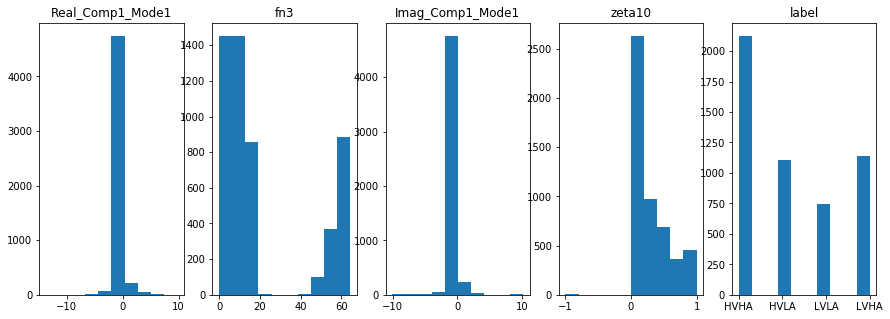

In [14]:
fig, axs = plt.subplots(1, 5, figsize=(15, 5))
axs[0].hist(df_learn.Real_Comp1_Mode1)
axs[0].set_title('Real_Comp1_Mode1')
axs[1].hist(df_learn.fn3)
axs[1].set_title('fn3')
axs[2].hist(df_learn.Imag_Comp1_Mode1)
axs[2].set_title('Imag_Comp1_Mode1')
axs[3].hist(df_learn.zeta10)
axs[3].set_title('zeta10')
axs[4].hist(df_learn.emotion_quad)
axs[4].set_title('label')

In [15]:
valid_idx=np.random.randint(low=0, high=len(df_learn), size=256*4)

In [16]:
dep_var= 'emotion_quad'

In [17]:
path = "/media/tris/tris_files/EEG_datasets/DMD/tabular"

In [18]:
data = TabularDataBunch.from_df(path, df_learn, dep_var, valid_idx=valid_idx)

In [19]:
data.show_batch()

In [ ]:
# max_log_y = np.log(np.max(df_raw['subject'])*1.2)
# y_range = torch.tensor([0, max_log_y])

In [ ]:
# learn = tabular_learner(data, layers=[2000,500], ps=[0.001,0.01], emb_drop=0.04, metrics=accuracy, emb_szs={'emotion_quad': 4})
learn = tabular_learner(data, layers=[20000,100], ps=[0.001,0.01], emb_drop=0.04, metrics=accuracy)

In [22]:
learn.model

TabularModel(
  (embeds): ModuleList()
  (emb_drop): Dropout(p=0.04, inplace=False)
  (bn_cont): BatchNorm1d(3302, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (layers): Sequential(
    (0): Linear(in_features=3302, out_features=20000, bias=True)
    (1): ReLU(inplace=True)
    (2): BatchNorm1d(20000, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (3): Dropout(p=0.001, inplace=False)
    (4): Linear(in_features=20000, out_features=100, bias=True)
    (5): ReLU(inplace=True)
    (6): BatchNorm1d(100, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (7): Dropout(p=0.01, inplace=False)
    (8): Linear(in_features=100, out_features=4, bias=True)
  )
)

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


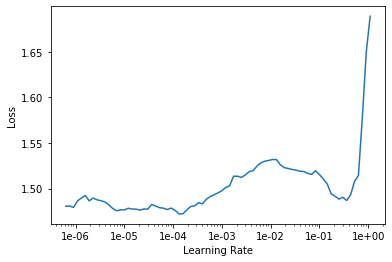

In [23]:
learn.lr_find()
learn.recorder.plot()

In [24]:
learn.fit_one_cycle(15, 5e-3, wd=0.2)

epoch,train_loss,valid_loss,accuracy,time
0,1.500654,1.445221,0.322266,00:03
1,0.891833,1.938212,0.329102,00:03
2,0.826941,1.682464,0.348633,00:03
3,0.622415,1.806918,0.373047,00:03
4,0.442383,2.069688,0.404297,00:03
5,0.286928,2.132628,0.391602,00:03
6,0.169584,2.318946,0.366211,00:03
7,0.125938,2.369178,0.410156,00:03
8,0.097323,2.650599,0.408203,00:03
9,0.064551,2.049155,0.429688,00:03


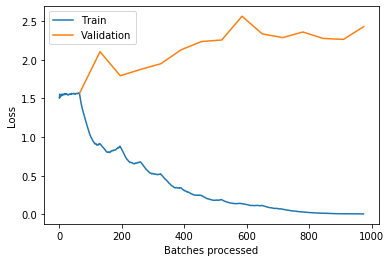

In [25]:
learn.recorder.plot_losses()

In [29]:
learn.show_results()

In [31]:
preds,y,losses = learn.get_preds(with_loss=True)
interp = ClassificationInterpretation(learn, preds, y, losses)

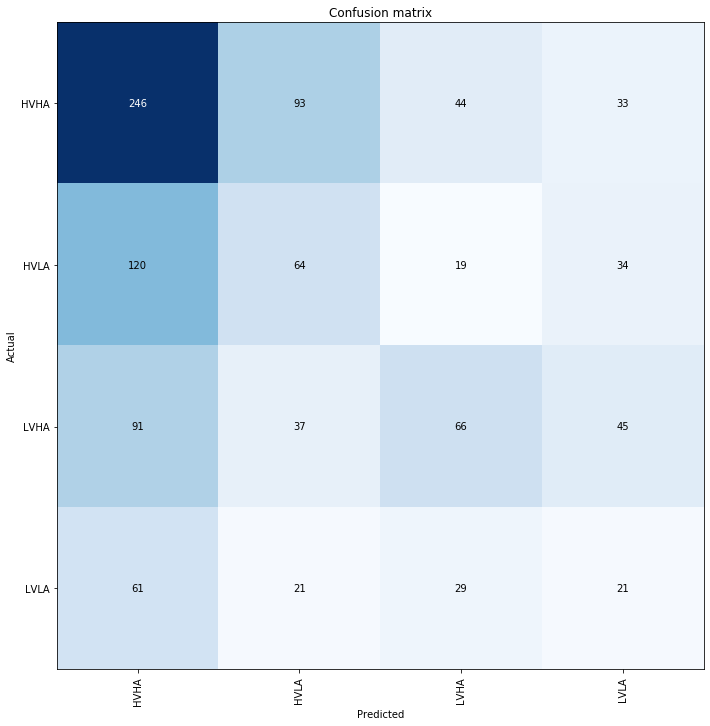

In [32]:
interp.plot_confusion_matrix(figsize=(10,10))